In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime, timedelta
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot, plot_weekly

Importing plotly failed. Interactive plots will not work.


In [2]:
dfday = pd.read_pickle('../../data/time_ecom/dfday.pkl')
df30 = pd.read_pickle('../../data/time_ecom/dfout30.pkl', compression='zip')
# df6 = pd.read_pickle('../../data/time_ecom/dfout6.pkl', compression='zip')
df30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 561 to 402
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   horizon         30 non-null     int64  
 1   df_daily        30 non-null     object 
 2   model           30 non-null     object 
 3   shf_model       30 non-null     object 
 4   forecast        30 non-null     object 
 5   shf_forecast    30 non-null     object 
 6   mape_error      30 non-null     float64
 7   abs_error       30 non-null     float64
 8   percent_growth  30 non-null     float64
 9   low_growth      30 non-null     float64
 10  high_growth     30 non-null     float64
dtypes: float64(5), int64(1), object(5)
memory usage: 2.8+ KB


In [3]:
df30.head(2)

,horizon,df_daily,model,shf_model,forecast,shf_forecast,mape_error,abs_error,percent_growth,low_growth,high_growth
561,28,ds y 1 2015-05-03 8 2 2015...,<fbprophet.forecaster.Prophet object at 0x7f7f...,<fbprophet.forecaster.Prophet object at 0x7f7f...,ds trend yhat_lower yhat_upp...,ds trend yhat_lower yhat_upp...,89.2,3.8,7.7,-63.0,93.9
955,28,ds y 1 2015-05-03 2 2 2015-0...,<fbprophet.forecaster.Prophet object at 0x7f7f...,<fbprophet.forecaster.Prophet object at 0x7f7f...,ds trend yhat_lower yhat_upp...,ds trend yhat_lower yhat_upp...,inf,2.5,0.1,-14.0,114.5


In [4]:
horiz = 28
future56 = dfday['ds'][-horiz * 2:]
shf56 = dfday['ds'][-horiz *3 : -horiz]
print(shf56[54], shf56[109])
print(future56[82], future56[137])
print(dfday['ds'].values[0], dfday['ds'].values[-1])

2015-06-25 00:00:00 2015-08-19 00:00:00
2015-07-23 00:00:00 2015-09-16 00:00:00
2015-05-03T00:00:00.000000000 2015-09-16T00:00:00.000000000


In [5]:
# pd.to_datetime(df['time']).astype(int)/ 10**9
# pd.to_datetime(shf56[56]).astype(int)
dfday['ds'].astype(int)[54]
# dfday['ds'].astype(int)[109]

1435190400000000000

In [6]:
# MAKE XTICKS ARRAYS
# base = datetime.datetime(2015, 5, 3)
# arr = numpy.array([base + datetime.timedelta(hours=i) for i in xrange(24)])
# t = np.arange(datetime(1985,7,1), datetime(2015,7,1), timedelta(days=1)).astype(datetime)
# ticks_full = np.arange(datetime(2015,5,3), datetime(2015,9,16), timedelta(days=14))
ticks_full = np.arange(datetime(2015,5,12), datetime(2015,9,16), timedelta(weeks=4))
ticks_full

array(['2015-05-12T00:00:00.000000', '2015-06-09T00:00:00.000000',
       '2015-07-07T00:00:00.000000', '2015-08-04T00:00:00.000000',
       '2015-09-01T00:00:00.000000'], dtype='datetime64[us]')

In [7]:
# ax.set_xticks(ticks = X_ticks)
# ax.set_xticklabels(X_labels)
# ax.yaxis.grid(True)
# ax.set_xlabel(x_name)
# ax.set_ylabel(y_name)
# ax.set_title(title)

In [8]:
df_full_forecast = pd.read_pickle('../../data/time_ecom/df_full_forecast.pkl', compression='zip')
df_full_forecast.head(2)

,horizon,df_daily,model,shf_model,forecast,shf_forecast,mape_error,abs_error,percent_growth,low_growth,high_growth
2222,28,ds y 1 2015-05-03 98 2 20...,<fbprophet.forecaster.Prophet object at 0x7f7f...,<fbprophet.forecaster.Prophet object at 0x7f7f...,ds trend yhat_lower yhat_u...,ds trend yhat_lower yhat_u...,18.6,26.3,-12.5,-12.7,58.0


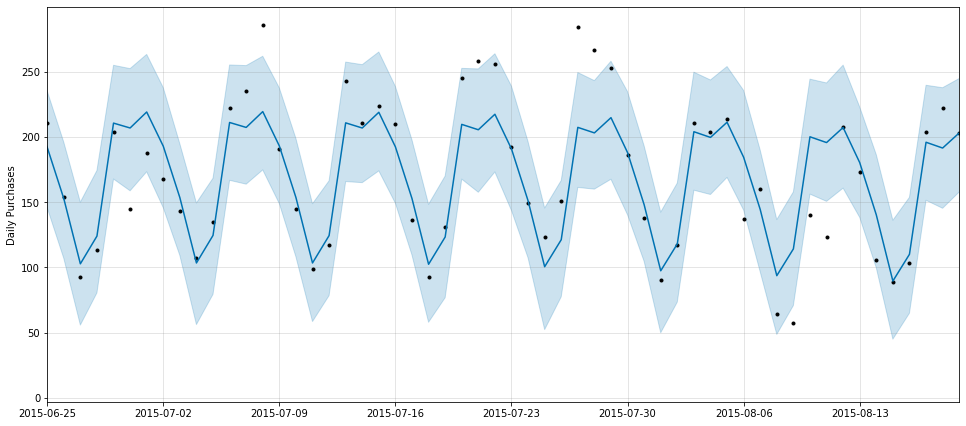

In [9]:
# GRAPHING DRAFT FUNCTION
# LETS DO MODELS SHF HERE
m = df_full_forecast.loc[2222, ['model']][0]
forecast = df_full_forecast.loc[2222, ['forecast']].values[0]

fig = plt.figure(figsize=(13.5,6))
ax = fig.add_subplot(1,1,1)
# plt.style.use('seaborn-whitegrid')

m.plot(forecast, ax=ax, xlabel=None, ylabel='Daily Purchases')
ax.set_xlim(( shf56[54], shf56[109]))

# ax.set_xticks(ticks_future)
# ax.set_xlim((ticks_future[-5], ticks_future[-1]))

# ax.set_title('Product Category 955')
# matplotlib.rc('axes', labelsize=20)
# matplotlib.rc('axes', titlesize=20)
# matplotlib.rc('xtick', labelsize=14) 
# matplotlib.rc('ytick', labelsize=16) 
plt.tight_layout(pad=1)
# plt.legend()
# fig.savefig('../img/shf_product955.png', dpi=100)

In [10]:
shf56[109]

Timestamp('2015-08-19 00:00:00')

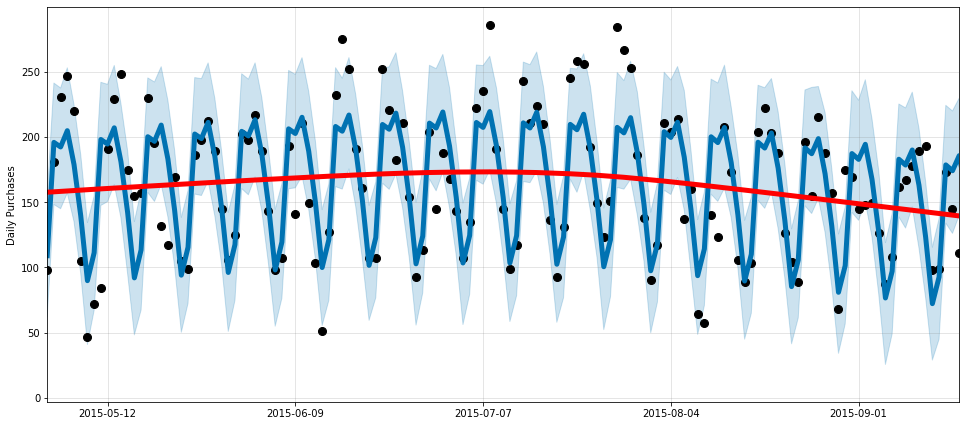

In [11]:
# FB full forecast graph 2
m = df_full_forecast.loc[2222, ['model']][0]
forecast = df_full_forecast.loc[2222, ['forecast']].values[0]

fig = plt.figure(figsize=(13.5,6))
ax = fig.add_subplot(1,1,1)
# plt.style.use('seaborn-whitegrid')

# ax.set_xlim((54 , 109))
# ax.set_xlim((2015050 , 2015090))
matplotlib.rc('axes', labelsize=32)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('xtick', labelsize=28) 
matplotlib.rc('ytick', labelsize=24)
matplotlib.rc('lines', linewidth=5) # , color='g'
matplotlib.rc('lines', markersize=16)

fig1 = m.plot(forecast, ax=ax, xlabel=None, ylabel='Daily Purchases')
a = add_changepoints_to_plot(fig1.gca(), m, forecast, threshold=0.09)
# ax.set_xlim(( shf56[54], shf56[109]))
# ax.set_xlim(( future56[82], future56[137] ))
ax.set_xlim((dfday['ds'].values[0], dfday['ds'].values[-1]))
ax.set_xticks(ticks_full)

# ax.set_title('FB Prophet Forecast')
plt.tight_layout(pad=1)
# plt.legend()
# fig.savefig('../img/fb_full_trend.png', dpi=100)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


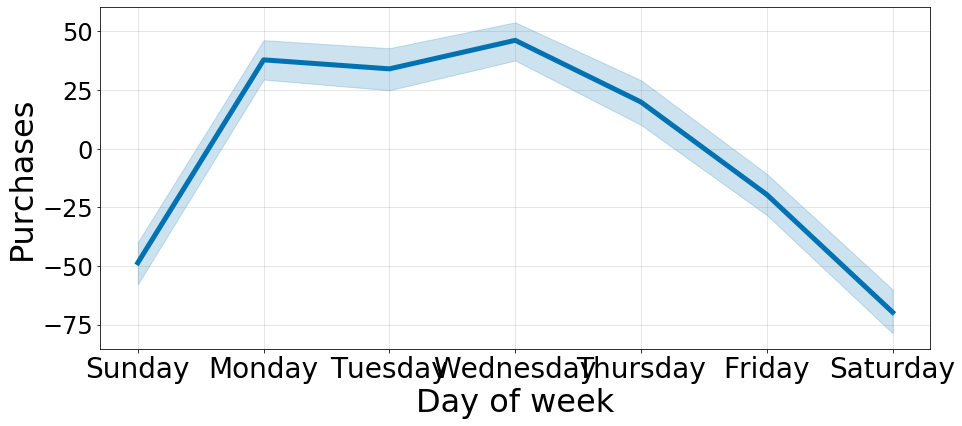

In [12]:
# weekly decomposition
m = df_full_forecast.loc[2222, ['model']][0]
forecast = df_full_forecast.loc[2222, ['forecast']].values[0]

fig = plt.figure(figsize=(13.5,6))
ax = fig.add_subplot(1,1,1)
matplotlib.rc('xtick', labelsize=26) 

# fig = m.plot_components(forecast, figsize=(13.5,6))
fig1 = plot_weekly(m, ax=ax, name='weekly') # figsize=(10, 6)
ax.set_ylabel("Purchases")
plt.tight_layout(pad=1)
# fig.savefig('../img/weekly.png', dpi=100)

In [13]:
df30.head(2)

,horizon,df_daily,model,shf_model,forecast,shf_forecast,mape_error,abs_error,percent_growth,low_growth,high_growth
561,28,ds y 1 2015-05-03 8 2 2015...,<fbprophet.forecaster.Prophet object at 0x7f7f...,<fbprophet.forecaster.Prophet object at 0x7f7f...,ds trend yhat_lower yhat_upp...,ds trend yhat_lower yhat_upp...,89.2,3.8,7.7,-63.0,93.9
955,28,ds y 1 2015-05-03 2 2 2015-0...,<fbprophet.forecaster.Prophet object at 0x7f7f...,<fbprophet.forecaster.Prophet object at 0x7f7f...,ds trend yhat_lower yhat_upp...,ds trend yhat_lower yhat_upp...,inf,2.5,0.1,-14.0,114.5


In [14]:
# SELECTING CATEGORIES
# df30['abs_error'].plot(kind='hist', bins=20)
round(df30['abs_error'].describe(), 2)

count    30.00
mean      1.97
std       0.71
min       0.90
25%       1.50
50%       1.75
75%       2.30
max       3.80
Name: abs_error, dtype: float64

In [15]:
filt = df30.loc[df30['abs_error'] < 1.75].sort_values(by='percent_growth', 
                                                      ascending=False)
filt.head(3)
# filt.tail(3)

,horizon,df_daily,model,shf_model,forecast,shf_forecast,mape_error,abs_error,percent_growth,low_growth,high_growth
897,28,ds y 1 2015-05-03 0 2 2015-0...,<fbprophet.forecaster.Prophet object at 0x7f7f...,<fbprophet.forecaster.Prophet object at 0x7f7f...,ds trend yhat_lower yhat_upp...,ds trend yhat_lower yhat_upp...,inf,1.5,11.1,-51.9,113.1
1667,28,ds y 1 2015-05-03 1 2 2015-0...,<fbprophet.forecaster.Prophet object at 0x7f7f...,<fbprophet.forecaster.Prophet object at 0x7f7f...,ds trend yhat_lower yhat_upp...,ds trend yhat_lower yhat_upp...,inf,1.7,8.3,-62.3,96.4
1383,28,ds y 1 2015-05-03 0 2 2015-0...,<fbprophet.forecaster.Prophet object at 0x7f7f...,<fbprophet.forecaster.Prophet object at 0x7f7f...,ds trend yhat_lower yhat_upp...,ds trend yhat_lower yhat_upp...,inf,1.6,7.7,-80.5,105.2


In [16]:
ticks_future = np.arange(datetime(2015,6,10), datetime(2015,10,20), timedelta(weeks=2))
ticks_future

array(['2015-06-10T00:00:00.000000', '2015-06-24T00:00:00.000000',
       '2015-07-08T00:00:00.000000', '2015-07-22T00:00:00.000000',
       '2015-08-05T00:00:00.000000', '2015-08-19T00:00:00.000000',
       '2015-09-02T00:00:00.000000', '2015-09-16T00:00:00.000000',
       '2015-09-30T00:00:00.000000', '2015-10-14T00:00:00.000000'],
      dtype='datetime64[us]')

In [17]:
cat_data = dfday[-horiz : ]
cat_data = cat_data.set_index('ds')
# cat_data.plot(color='black')
cat_data.shape
# cat_data

(28, 1)

/home/scorpio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.


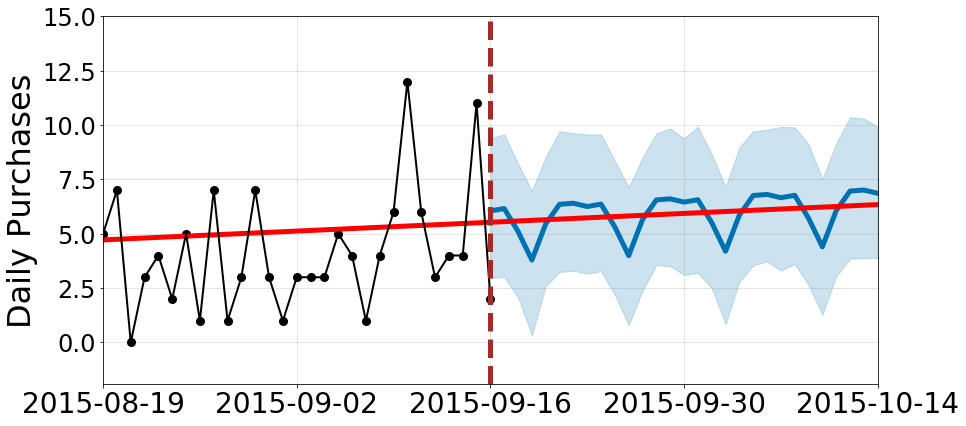

In [76]:
# product category future forecast
parent = 1426 # 1426 and 500 for presentation
top_list = [897, 1368, 1667] # top3 filter
bot_list = [1606, 500, 250] # bot 3 filter
interesting = [1426, 105] # high growth, low growth, 

fig = plt.figure(figsize=(13.5,6))
ax = fig.add_subplot(1,1,1)
matplotlib.rc('xtick', labelsize=28) 
# plt.style.use('seaborn-whitegrid')
# matplotlib.rc('axes', labelsize=20)
# matplotlib.rc('axes', titlesize=20)
# SINGLE
m = df30.loc[parent, ['model']][0]
fore = df30.loc[parent, ['forecast']].values[0]
fig1 = m.plot(fore[-horiz-1:], ax=ax, xlabel=None, ylabel='Daily Purchases')
# a = add_changepoints_to_plot(fig1.gca(), m, fore[-horiz-1:], threshold=0.09)
# fig1 = m.plot(fore, ax=ax, xlabel=None, ylabel='Daily Purchases')
a = add_changepoints_to_plot(fig1.gca(), m, fore, threshold=0.09)
# FROM LIST
# for category in top_list:
#     m = df30.loc[category, ['model']][0]
#     fore = df30.loc[category, ['forecast']].values[0]
#     m.plot(fore, ax=ax, xlabel=None, ylabel='Daily Purchases')

ax.set_xticks(ticks_future)
ax.set_xlim((ticks_future[-5], ticks_future[-1]))
ax.set_ylim((-1.9,15))

cat_day = df30.loc[parent, ['df_daily']][0] # .set_index('ds')
cat_day = cat_day[-horiz-1 : ]
ax.plot('ds', 'y', data=cat_day, color='black', linewidth=2) # 

# ax = cat_day[-horiz-1 : ].plot(x='ds', y='y', kind='line', ax=ax, color='black', 
#                           legend=False, grid=True) # useindex=False

# ax.tick_params('y', reset=False, labelrotation=0)
# ax.set_title(f'Product Category {parent}')
ax.axvline(ticks_future[-3], label='Future Threshold', linestyle='--', color='brown')

plt.tight_layout(pad=1)
# plt.legend()
# fig.savefig(f'../img/future58_{parent}.png', dpi=100)

In [19]:
# median error 1.75
# 1426 g14.7 e3.1 --- 105 g-13.9 e2.0 --- (from top10)
# 1667 g8.3 e1.7 --- 500 g-41.2 e1.4 --- (from <1.75% filter)
# df30.head(10)

In [47]:
# df30.loc[parent, ['model']][0]
# df30.head(2)
# cat_day = df30.loc[parent, ['df_daily']][0].set_index('ds')
# cat_day[-horiz : ]
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [77]:
# cat_day = df30.loc[parent, ['df_daily']][0] # .set_index('ds')
# ax = cat_day[-horiz-1 : ].plot(x='ds', y='y', kind='line', color='black', legend=False, 
#                           grid=True) # useindex=False
# ax.set_xticks(ticks_future)
# ax.set_xlim((ticks_future[-5], ticks_future[-1]))
# ax.set_ylim((-2,15))

In [ ]:
# SHF PLOT FINALLY
fig = plt.figure(figsize=(13.5,6))
ax = fig.add_subplot(1,1,1)
matplotlib.rc('xtick', labelsize=28) 
# plt.style.use('seaborn-whitegrid')
# matplotlib.rc('axes', labelsize=20)
# matplotlib.rc('axes', titlesize=20)
# SINGLE
m = df30.loc[parent, ['model']][0]
fore = df30.loc[parent, ['forecast']].values[0]
fig1 = m.plot(fore[-horiz-1:], ax=ax, xlabel=None, ylabel='Daily Purchases')
# a = add_changepoints_to_plot(fig1.gca(), m, fore[-horiz-1:], threshold=0.09)
# fig1 = m.plot(fore, ax=ax, xlabel=None, ylabel='Daily Purchases')
a = add_changepoints_to_plot(fig1.gca(), m, fore, threshold=0.09)
# FROM LIST
# for category in top_list:
#     m = df30.loc[category, ['model']][0]
#     fore = df30.loc[category, ['forecast']].values[0]
#     m.plot(fore, ax=ax, xlabel=None, ylabel='Daily Purchases')

ax.set_xticks(ticks_future)
ax.set_xlim((ticks_future[-5], ticks_future[-1]))
ax.set_ylim((-1.9,15))

cat_day = df30.loc[parent, ['df_daily']][0] # .set_index('ds')
cat_day = cat_day[-horiz-1 : ]
ax.plot('ds', 'y', data=cat_day, color='black', linewidth=2)

# ax.tick_params('y', reset=False, labelrotation=0)
# ax.set_title(f'Product Category {parent}')
# ax.axvline(ticks_future[-3], label='Future Threshold', linestyle='--', color='brown')

plt.tight_layout(pad=1)
# plt.legend()
# fig.savefig(f'../img/future58_{parent}.png', dpi=100)